#### Import Module/Package 

In [152]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

### Import main dataset

In [154]:
csv_file_path = "loan_data_2007_2014.csv"
feather_file_path = "loan_data_2007_2014.feather"

In [155]:
if not os.path.exists(feather_file_path):

    df = pd.read_csv(csv_file_path, index_col=0)

    df.to_feather("loan_data_2007_2014.feather")

else:
    
    df = pd.read_feather(feather_file_path)

In [156]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,None,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df.shape

(466285, 74)

### Import dataset description

In [158]:
desc_df = pd.read_excel("LCDataDictionary.xlsx")

In [159]:
desc_df

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for that loan at that point in time.,Jumlah total yang dilakukan oleh investor untuk pinjaman itu pada saat itu.
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan application,Negara yang disediakan oleh peminjam dalam aplikasi pinjaman
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by the borrower during registration.,v
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pendaftaran
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers,NaN
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
8,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,Jumlah 30+ hari insiden kenakalan yang lewat dalam file kredit peminjam selama 2 tahun terakhir


#### Sort the columns name to easily understanding the main dataframe columns based on dataframe description

In [160]:
columns = list(df.columns)
columns.sort()

df = df[columns]

In [161]:
df.head(1)

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.0,0.0,0.0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,NaN,Jan-85,10+ years,None,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,None,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,credit_card,n,0.0,13648,83.7,B2,36 months,Computer,NaN,NaN,9.0,NaN,NaN,5861.071414,5831.78,861.07,0.0,5000.0,NaN,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx


# Exploratory Data Analysis (EDA) "Numerical Data"

In [162]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   acc_now_delinq               466256 non-null  float64
 1   addr_state                   466285 non-null  object 
 2   all_util                     0 non-null       float64
 3   annual_inc                   466281 non-null  float64
 4   annual_inc_joint             0 non-null       float64
 5   application_type             466285 non-null  object 
 6   collection_recovery_fee      466285 non-null  float64
 7   collections_12_mths_ex_med   466140 non-null  float64
 8   delinq_2yrs                  466256 non-null  float64
 9   desc                         125983 non-null  object 
 10  dti                          466285 non-null  float64
 11  dti_joint                    0 non-null       float64
 12  earliest_cr_line             466256 non-null  object 
 13 

#### Check % null values in each columns dataframe

In [163]:
colnames = df.columns

pct_NA = []

for col in colnames:
    
    pct_NA.append(round((df[col].isna().sum() / df.shape[0]) * 100, 2))
    
pct_NA = pd.DataFrame(pct_NA, index = [colnames], columns = ['Percentages']).reset_index()
    

In [164]:
pct_NA

,level_0,Percentages
0,acc_now_delinq,0.01
1,addr_state,0.00
2,all_util,100.00
3,annual_inc,0.00
4,annual_inc_joint,100.00
5,application_type,0.00
6,collection_recovery_fee,0.00
7,collections_12_mths_ex_med,0.03
8,delinq_2yrs,0.01
9,desc,72.98


#### Check if any Duplicate Member

In [165]:
print('Unique member id : ', df['member_id'].unique().shape[0], ', Total row data : ', df.shape[0])

Unique member id :  466285 , Total row data :  466285


There is no duplicate member in dataframe

#### Drop column 'id' and 'member_id'  because we don't need it for machine learning model and other columns which has contains > 25% null values

In [166]:
unused_col = pct_NA[pct_NA['Percentages'] > 25]['level_0']

In [167]:
unused_col = list(unused_col) + ['member_id', 'id']

In [168]:
unused_col

['all_util',
 'annual_inc_joint',
 'desc',
 'dti_joint',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'next_pymnt_d',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_il_6m',
 'open_rv_12m',
 'open_rv_24m',
 'total_bal_il',
 'total_cu_tl',
 'verification_status_joint',
 'member_id',
 'id']

In [169]:
df.drop(labels = unused_col, axis = 1, inplace = True)

 #### Because the data has no labels, try to analyze loan status and determine labels from it

In [170]:
loan_status = df['loan_status'].value_counts()

In [171]:
loan_status

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Current : 48.09%
Fully Paid : 39.62%
Charged Off : 9.11%
Late (31-120 days) : 1.48%
In Grace Period : 0.67%
Does not meet the credit policy. Status:Fully Paid : 0.43%
Late (16-30 days) : 0.26%
Default : 0.18%
Does not meet the credit policy. Status:Charged Off : 0.16%


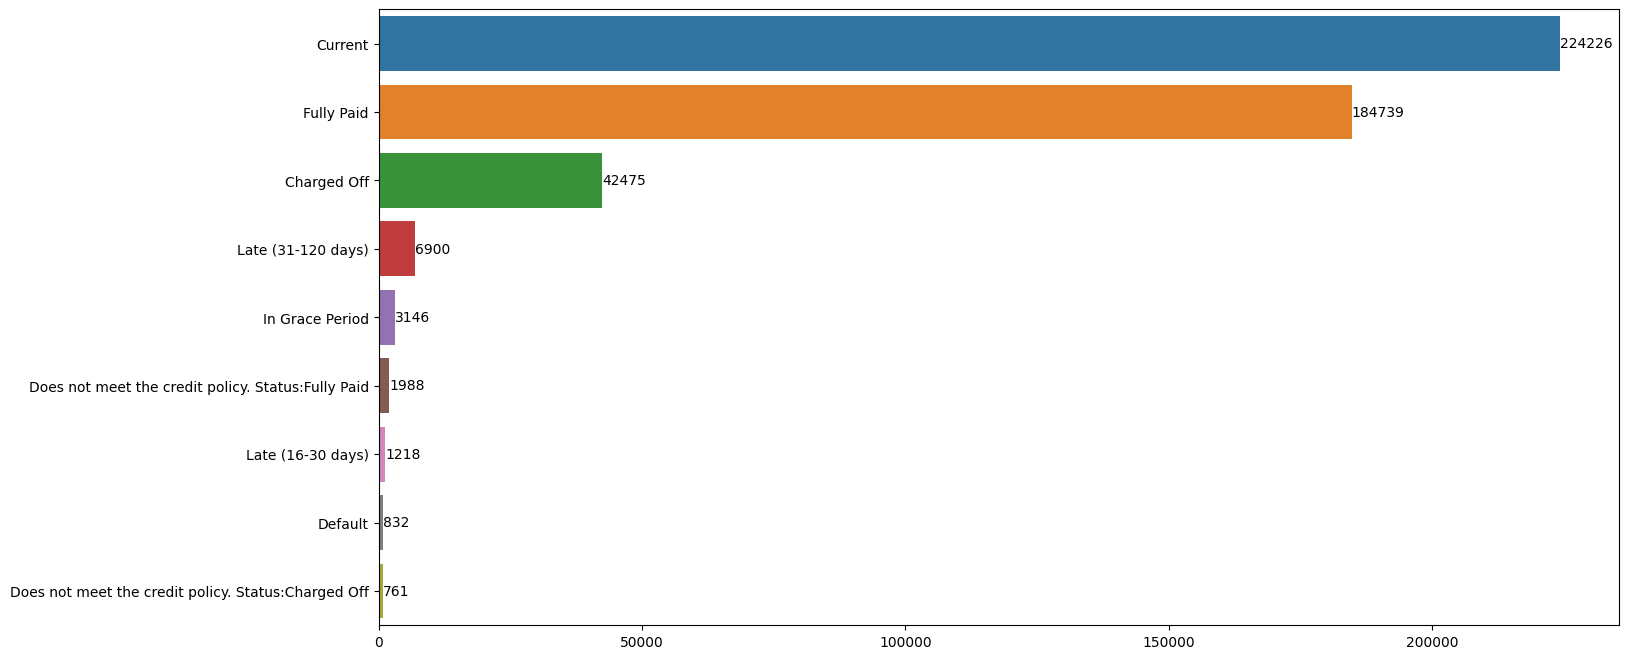

In [172]:
plt.figure(figsize = (16, 8))
ax = sns.barplot(x = loan_status.values, y = loan_status.index)

for val in ax.containers:
    ax.bar_label(val,)

for stat in loan_status.index:
    
    print(stat, ':', f"{round((loan_status[stat] / 466285)  * 100, 2)}%")

In [173]:
good_tag = ['Fully Paid'] 
bad_tag = ['Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 
       'Default', 'Does not meet the credit policy. Status:Charged Off']

In [174]:
def add_Label(values):  
    if values in good_tag:
        return 1
    return 0

### Filter with loan status

In [175]:
new_df = df[df['loan_status'].isin(good_tag + bad_tag)].copy()
new_df['loan_status'] = new_df['loan_status'].apply(add_Label)

In [176]:
new_df.shape

(230795, 50)

In [177]:
new_df['loan_status'].value_counts()

1    184739
0     46056
Name: loan_status, dtype: int64

There is an imbalance between good and bad tags, this needs to be handled with the SMOTE method later

### Plot % good and bad credit

In [178]:
good_bad_Credit = new_df['loan_status'].value_counts().sort_values()

In [179]:
good_bad_Credit = pd.DataFrame(good_bad_Credit)

In [180]:
good_bad_Credit

,loan_status
0,46056
1,184739


<AxesSubplot: ylabel='loan_status'>

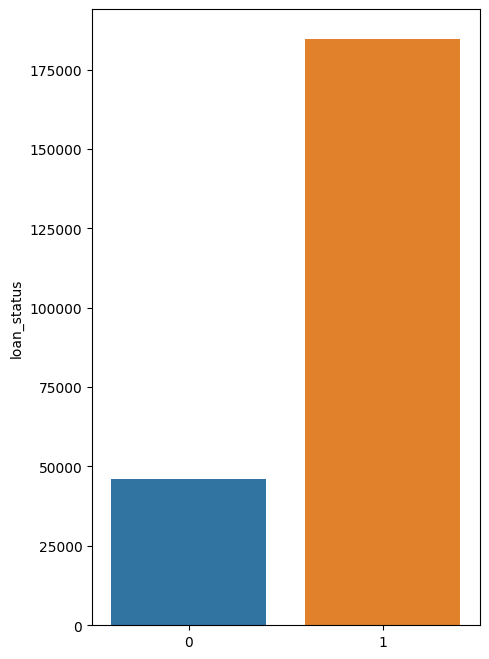

In [181]:
plt.figure(figsize = (5, 8))

sns.barplot(x = good_bad_Credit.index, 
            y = good_bad_Credit['loan_status'],   
            data = good_bad_Credit)


#### Check correlation 

In [182]:
correlations = (new_df.select_dtypes(exclude=object)
                .corr()
                .dropna(how="all", axis=0)
                .dropna(how="all", axis=1)
)

In [183]:
correlations

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,loan_status,open_acc,out_prncp,out_prncp_inv,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
acc_now_delinq,1.000000,0.017705,0.005539,0.016905,0.110191,0.009668,0.013234,0.013695,-0.003573,0.015888,0.032449,0.014618,0.012910,-0.006406,0.019186,0.004899,0.004896,0.005006,0.009469,0.005802,-0.018051,0.000038,0.022506,0.027722,0.005756,0.006158,0.005189,0.001696,0.004396,0.019364
annual_inc,0.017705,1.000000,0.022833,0.005405,0.055491,-0.175644,0.348446,0.343603,0.057142,0.346351,-0.018747,0.233098,0.349604,0.061623,0.152344,0.005133,0.005134,-0.019427,0.029302,0.319691,0.024763,0.002448,0.473072,0.224585,0.326247,0.323036,0.200985,0.013503,0.321321,0.327861
collection_recovery_fee,0.005539,0.022833,1.000000,0.005494,0.017024,0.043439,0.131193,0.127039,0.030299,0.118112,0.118823,-0.114068,0.130755,-0.300094,0.029090,-0.007468,-0.007467,-0.002296,0.798358,0.031132,0.037179,-0.000385,0.016266,0.026507,-0.032753,-0.035212,0.082825,0.085569,-0.134753,0.021582
collections_12_mths_ex_med,0.016905,0.005405,0.005494,1.000000,0.041000,0.003746,0.000063,0.001131,-0.000262,0.001748,0.030323,0.012088,-0.000341,-0.005582,0.018024,-0.000018,-0.000017,0.022718,0.007241,-0.009741,-0.022139,0.004300,0.002731,0.018729,-0.007603,-0.006656,-0.009190,-0.000824,-0.007074,-0.008999
delinq_2yrs,0.110191,0.055491,0.017024,0.041000,1.000000,-0.000131,0.011765,0.012580,0.022598,0.023201,0.102812,0.019650,0.010915,-0.019631,0.059392,0.012856,0.012854,-0.004557,0.019803,-0.029789,-0.014497,-0.000597,0.067340,0.128817,0.000886,0.001489,0.020586,0.024692,-0.006187,-0.037708
dti,0.009668,-0.175644,0.043439,0.003746,-0.000131,1.000000,0.060812,0.067427,-0.003903,0.061073,0.170503,0.016022,0.058736,-0.107257,0.312705,0.020996,0.020995,-0.033634,0.056818,0.151258,0.227917,-0.003977,-0.017437,0.236212,0.009429,0.015419,0.076672,-0.003021,-0.014310,0.061899
funded_amnt,0.013234,0.348446,0.131193,0.000063,0.011765,0.060812,1.000000,0.991833,-0.005709,0.960092,0.211841,0.564169,0.997201,-0.048790,0.204664,0.042760,0.042760,-0.071543,0.189576,0.316689,0.104657,-0.002143,0.317071,0.237000,0.843869,0.839869,0.680053,0.047626,0.778977,0.349757
funded_amnt_inv,0.013695,0.343603,0.127039,0.001131,0.012580,0.067427,0.991833,1.000000,-0.017287,0.951350,0.214592,0.567227,0.988410,-0.039854,0.205565,0.043342,0.043342,-0.068596,0.187322,0.308645,0.107757,-0.002141,0.317045,0.237658,0.838066,0.847111,0.673910,0.039927,0.774094,0.349715
inq_last_6mths,-0.003573,0.057142,0.030299,-0.000262,0.022598,-0.003903,-0.005709,-0.017287,1.000000,0.008433,0.200815,-0.006400,-0.005002,-0.116393,0.099302,-0.000722,-0.000724,0.040258,0.037902,-0.003687,-0.088959,0.001074,0.071792,0.124677,-0.020647,-0.029141,0.040084,0.031262,-0.037758,0.024734
installment,0.015888,0.346351,0.118112,0.001748,0.023201,0.061073,0.960092,0.951350,0.008433,1.000000,0.201046,0.505344,0.955865,-0.033419,0.201125,0.033158,0.033159,-0.062594,0.167514,0.311589,0.133294,-0.001703,0.285851,0.219777,0.822365,0.817884,0.634625,0.054642,0.768008,0.324128


In [184]:
correlations['loan_status'].sort_values(ascending = False)

loan_status                   1.000000
total_rec_prncp               0.460338
last_pymnt_amnt               0.384781
total_pymnt_inv               0.358588
total_pymnt                   0.355349
tot_cur_bal                   0.076230
annual_inc                    0.061623
total_rev_hi_lim              0.052931
total_acc                     0.030680
tot_coll_amt                  0.001637
collections_12_mths_ex_med   -0.005582
pub_rec                      -0.006355
acc_now_delinq               -0.006406
revol_bal                    -0.011371
open_acc                     -0.013934
delinq_2yrs                  -0.019631
total_rec_int                -0.032997
installment                  -0.033419
funded_amnt_inv              -0.039854
funded_amnt                  -0.048790
loan_amnt                    -0.049253
revol_util                   -0.089180
out_prncp_inv                -0.099814
out_prncp                    -0.099816
dti                          -0.107257
inq_last_6mths           

In [185]:
correlations.shape

(30, 30)

In [186]:
min_Cor, max_Cor = 0.1, 0.99

positive_Cor = (correlations > min_Cor) & (correlations < max_Cor)
negative_Cor = (correlations > -max_Cor) & (correlations < -min_Cor)

# make all correlations score values into absolute values 
filter_Cor = correlations[positive_Cor | negative_Cor]

In [187]:
feature_HighCor = filter_Cor[(filter_Cor >= 0.5) & (filter_Cor <= 0.9)]
feature_LowCor = filter_Cor[(filter_Cor >= 0.3) & (filter_Cor < 0.5)]

#### Plot feature with high correlations

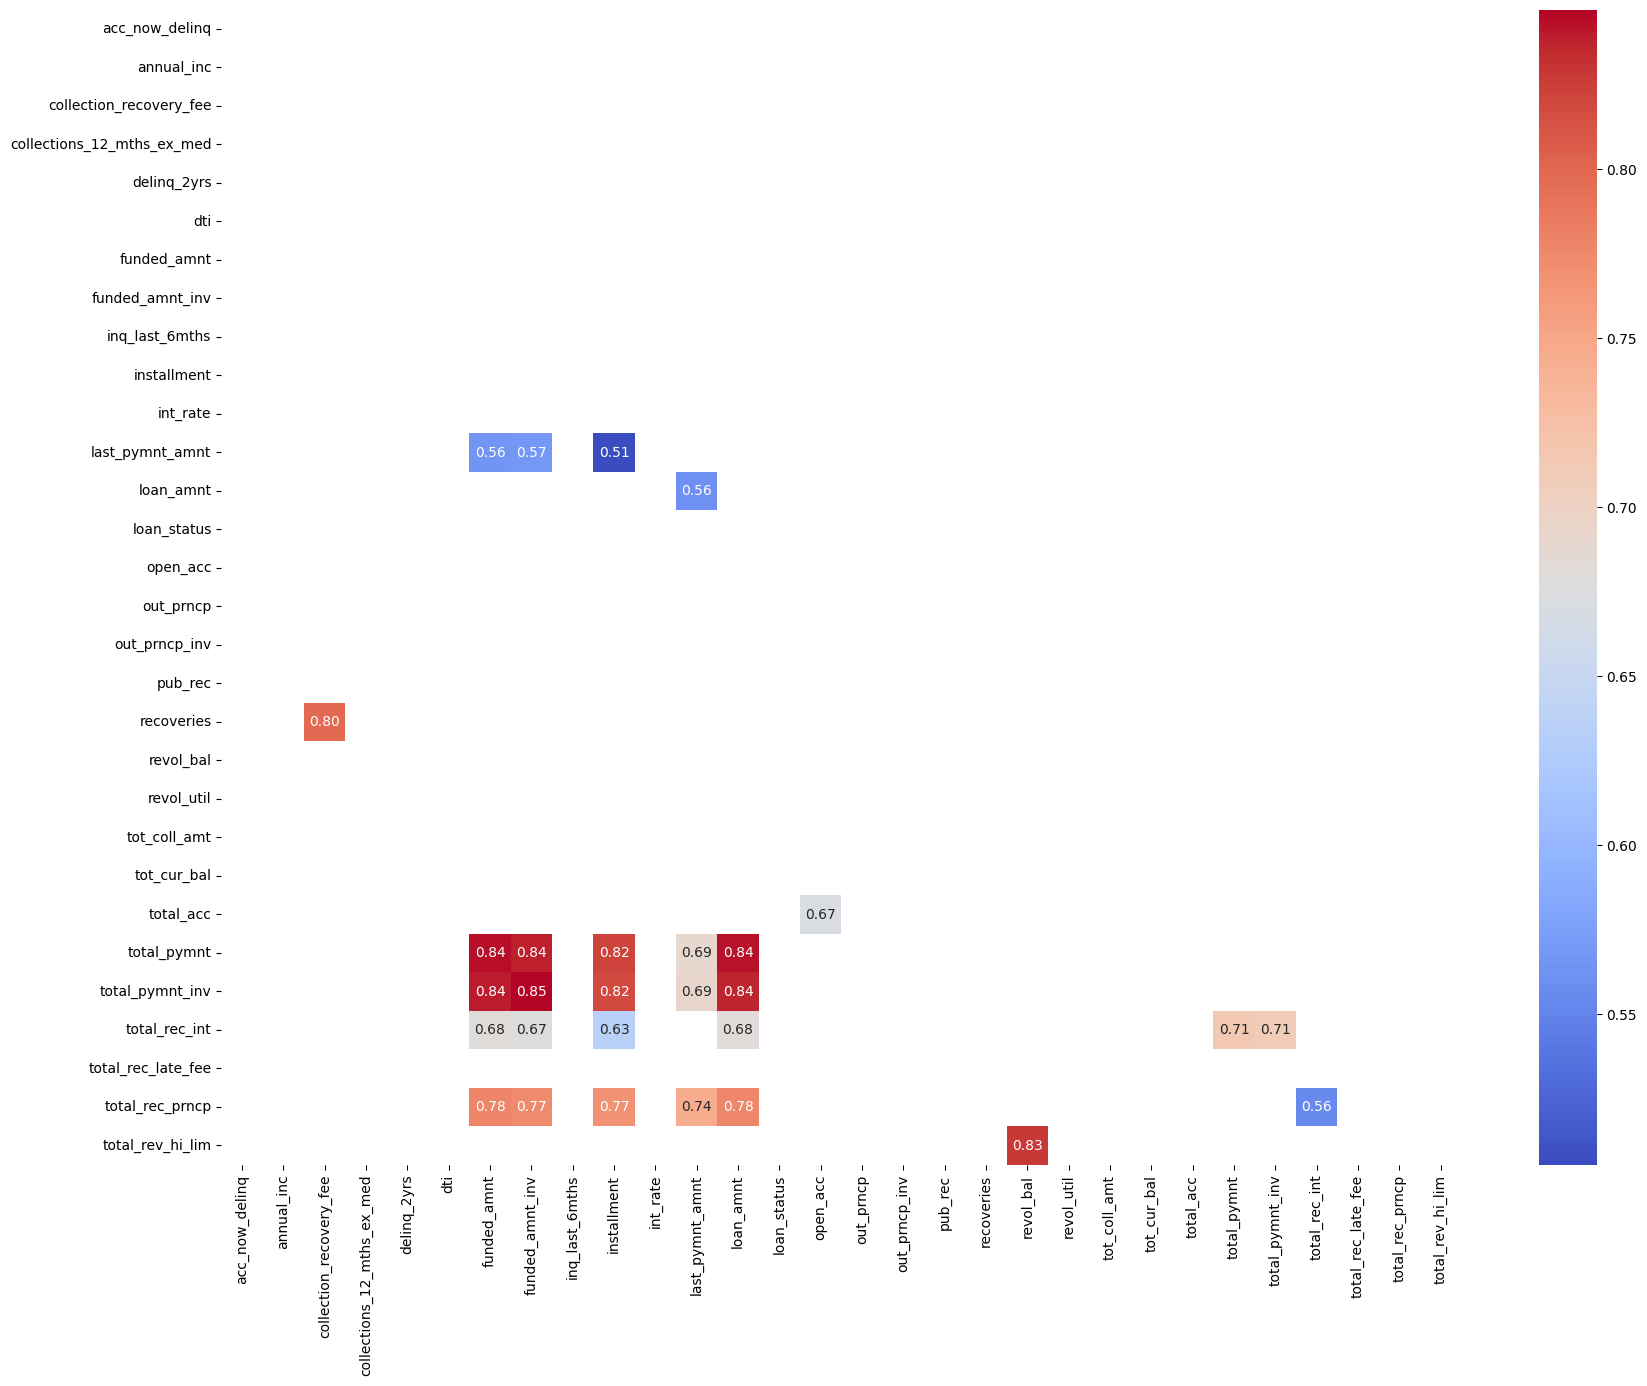

In [188]:
plt.figure(figsize = (20, 15))
cor_plot = sns.heatmap(
                feature_HighCor, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(feature_HighCor, dtype=bool))
)

#### get colnames with high correlations value

In [189]:
selected_feature1 = feature_HighCor.columns[feature_HighCor.notnull().any()].tolist()

selected_feature1

['collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'last_pymnt_amnt',
 'loan_amnt',
 'open_acc',
 'recoveries',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim']

In [190]:
len(selected_feature1)

15

#### Plot feature with low correlations

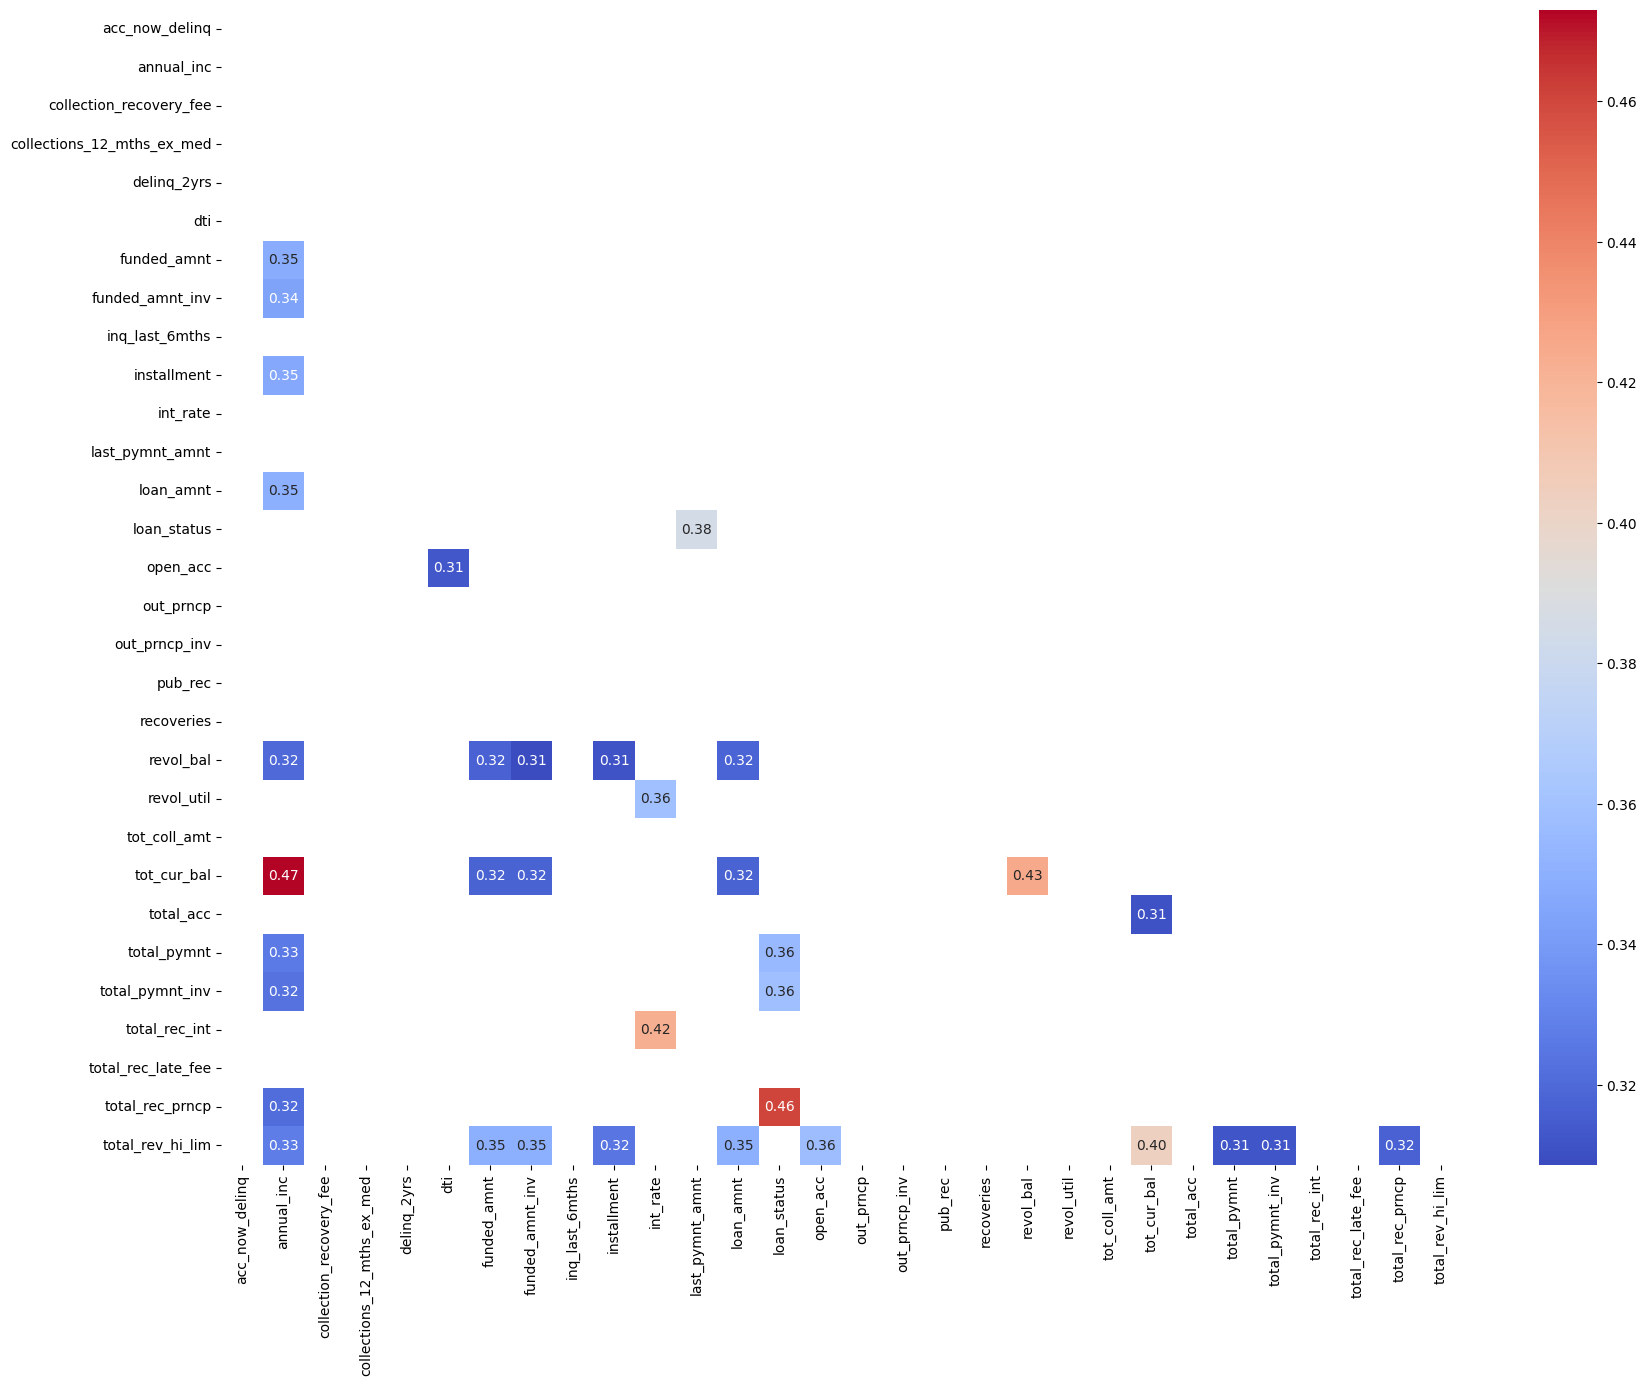

In [191]:
plt.figure(figsize = (20, 15))
cor_plot = sns.heatmap(
                feature_LowCor, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(feature_LowCor, dtype=bool))
)

##### get colnames with low correlations value

In [192]:
selected_feature2 = feature_LowCor.columns[feature_LowCor.notnull().any()].tolist()

selected_feature2

['annual_inc',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'revol_bal',
 'revol_util',
 'tot_cur_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim']

In [193]:
len(selected_feature2)

19

do some filtering again to remove duplicate columns between selected_feature1 dan selected_feature2

In [194]:
selected_NumericalFeature = set(selected_feature1).union(set(selected_feature2))

selected_NumericalFeature = list(selected_NumericalFeature)

selected_NumericalFeature.sort()

In [195]:
selected_NumericalFeature, len(selected_NumericalFeature)

(['annual_inc',
  'collection_recovery_fee',
  'dti',
  'funded_amnt',
  'funded_amnt_inv',
  'installment',
  'int_rate',
  'last_pymnt_amnt',
  'loan_amnt',
  'loan_status',
  'open_acc',
  'recoveries',
  'revol_bal',
  'revol_util',
  'tot_cur_bal',
  'total_acc',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_prncp',
  'total_rev_hi_lim'],
 21)

#### Finally we got total 21 numerical features which we will use in machine learning model

#### Check the distribution of selected numerical feature


In [196]:
new_df[list(selected_NumericalFeature)]

,annual_inc,collection_recovery_fee,dti,funded_amnt,funded_amnt_inv,installment,int_rate,last_pymnt_amnt,loan_amnt,loan_status,open_acc,recoveries,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim
0,24000.0,0.000,27.65,5000,4975.0,162.87,10.65,171.62,5000,1,3.0,0.00,13648,83.7,NaN,9.0,5861.071414,5831.78,861.07,5000.00,NaN
1,30000.0,1.110,1.00,2500,2500.0,59.83,15.27,119.66,2500,0,3.0,117.08,1687,9.4,NaN,4.0,1008.710000,1008.71,435.17,456.46,NaN
2,12252.0,0.000,8.72,2400,2400.0,84.33,15.96,649.91,2400,1,2.0,0.00,2956,98.5,NaN,10.0,3003.653644,3003.65,603.65,2400.00,NaN
3,49200.0,0.000,20.00,10000,10000.0,339.31,13.49,357.48,10000,1,10.0,0.00,5598,21.0,NaN,37.0,12226.302210,12226.30,2209.33,10000.00,NaN
5,36000.0,0.000,11.20,5000,5000.0,156.46,7.90,161.03,5000,1,9.0,0.00,7963,28.3,NaN,12.0,5631.377753,5631.38,631.38,5000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,37536.0,11.594,12.28,8525,8525.0,217.65,18.25,217.65,8525,0,12.0,1159.40,5318,10.7,116995.0,26.0,2029.930000,2029.93,510.45,360.08,49800.0
466277,90000.0,0.000,10.33,18000,17975.0,563.23,7.90,563.23,18000,0,16.0,0.00,8224,16.3,42592.0,33.0,5631.670000,5623.85,1050.78,4580.89,50300.0
466278,42000.0,0.000,11.57,10000,10000.0,362.78,18.25,5501.60,10000,1,9.0,0.00,3196,28.8,10170.0,24.0,12394.165200,12394.17,2394.17,10000.00,11100.0
466281,78000.0,0.000,18.45,22000,22000.0,582.50,19.97,17.50,22000,0,18.0,0.00,18238,46.3,221830.0,30.0,4677.920000,4677.92,2840.88,1837.04,39400.0


#### Separate X features and y label, because we want to process numerical features

In [197]:
y = new_df['loan_status']

In [198]:
new_df.drop('loan_status', inplace = True, axis = 1)

In [199]:
selected_NumericalFeature.remove('loan_status')

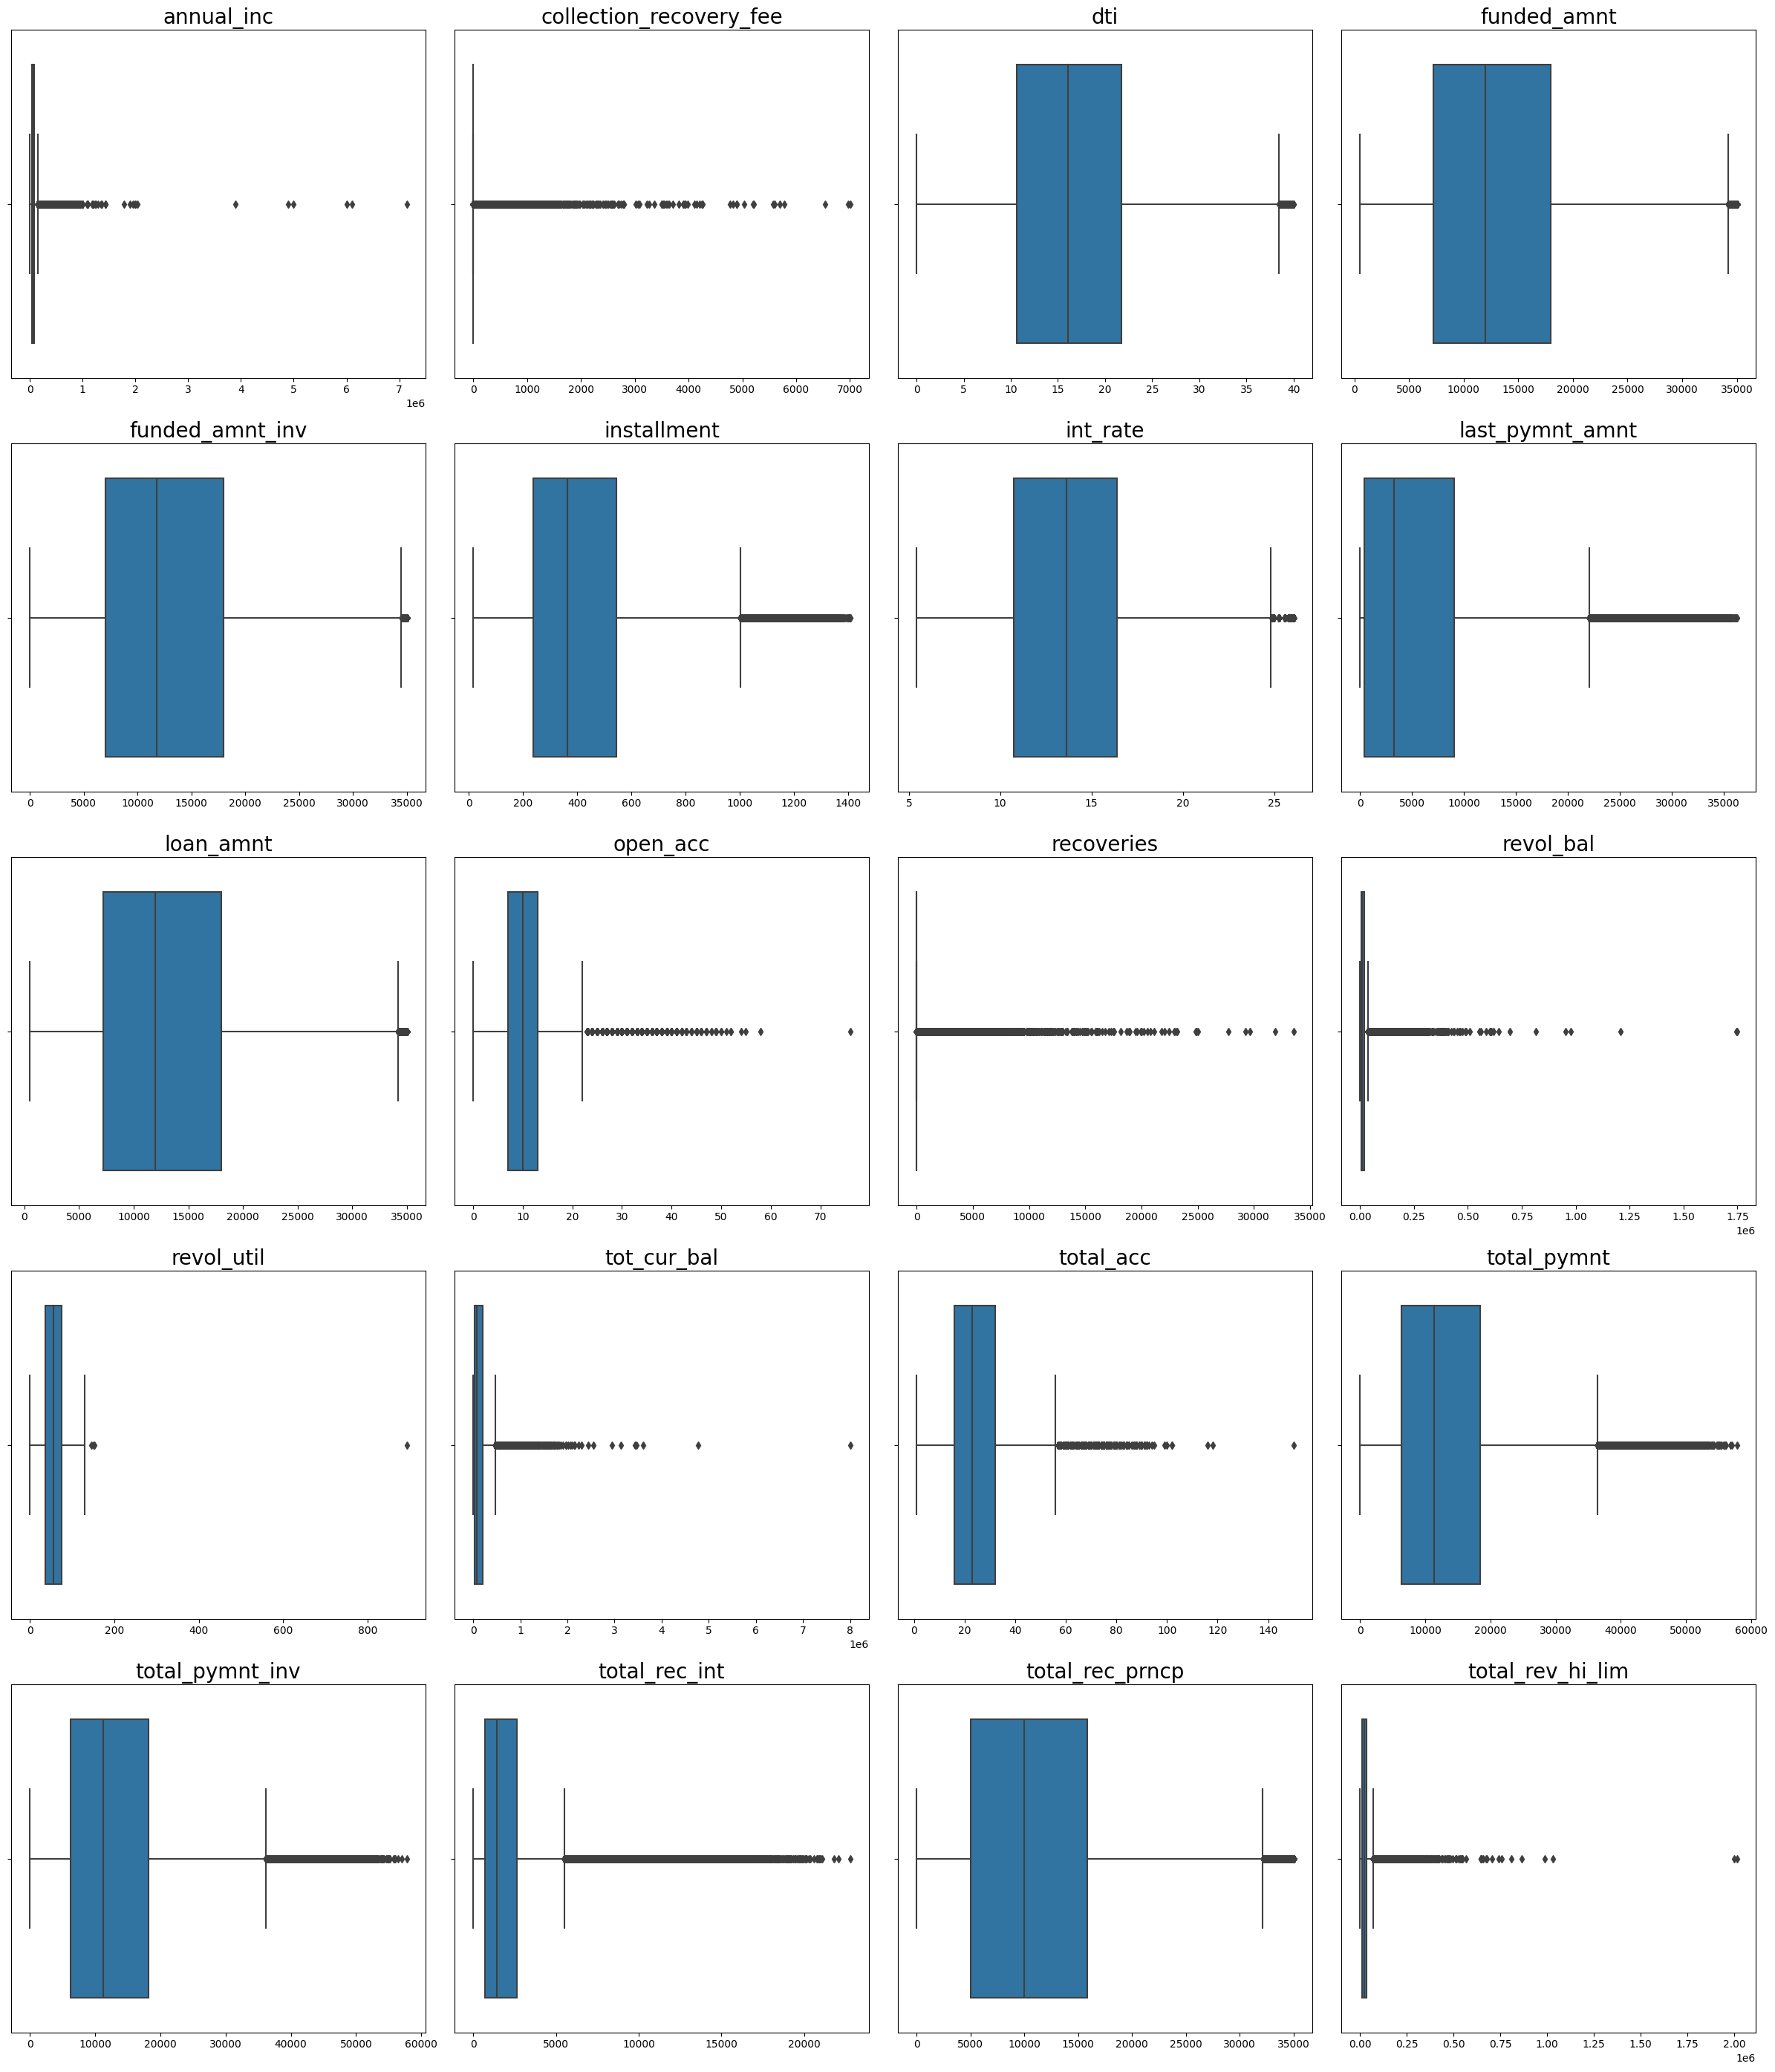

In [200]:
plt.figure(figsize=(24,28))
i = 1
for colname in selected_NumericalFeature:
    plt.subplot(5, 4, i)
    sns.boxplot(x=new_df[list(selected_NumericalFeature)][colname])
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1



In [201]:
new_df[selected_NumericalFeature].isna().sum()

annual_inc                     4
collection_recovery_fee        0
dti                            0
funded_amnt                    0
funded_amnt_inv                0
installment                    0
int_rate                       0
last_pymnt_amnt                0
loan_amnt                      0
open_acc                      29
recoveries                     0
revol_bal                      0
revol_util                   226
tot_cur_bal                66475
total_acc                     29
total_pymnt                    0
total_pymnt_inv                0
total_rec_int                  0
total_rec_prncp                0
total_rev_hi_lim           66475
dtype: int64

#### Because there is still many outlier and null values from the data, lets do some data cleansing

In [202]:
# Remove Outlier and fill NA

for colnames in selected_NumericalFeature:
    # IQR = Q3 - Q1
    # Lower Limit = Q1 - 1.5 * IQR
    # Upper Limit = Q3 + 1.5 * IQR
    IQR = new_df[colnames].describe()[6] - new_df[colnames].describe()[4]
    lower_limit = new_df[colnames].describe()[4] - (1.5 * IQR)
    upper_limit = new_df[colnames].describe()[6] + (1.5 * IQR)
    
    new_df.loc[new_df[colnames] >= upper_limit, colnames] = upper_limit
    new_df.loc[new_df[colnames] <= lower_limit, colnames] = lower_limit
    
    # Fill NA
    new_df[colnames].fillna(value = new_df[colnames].describe()[5], inplace = True)
    


#### Let's plot again to make sure there is no outlier in the data

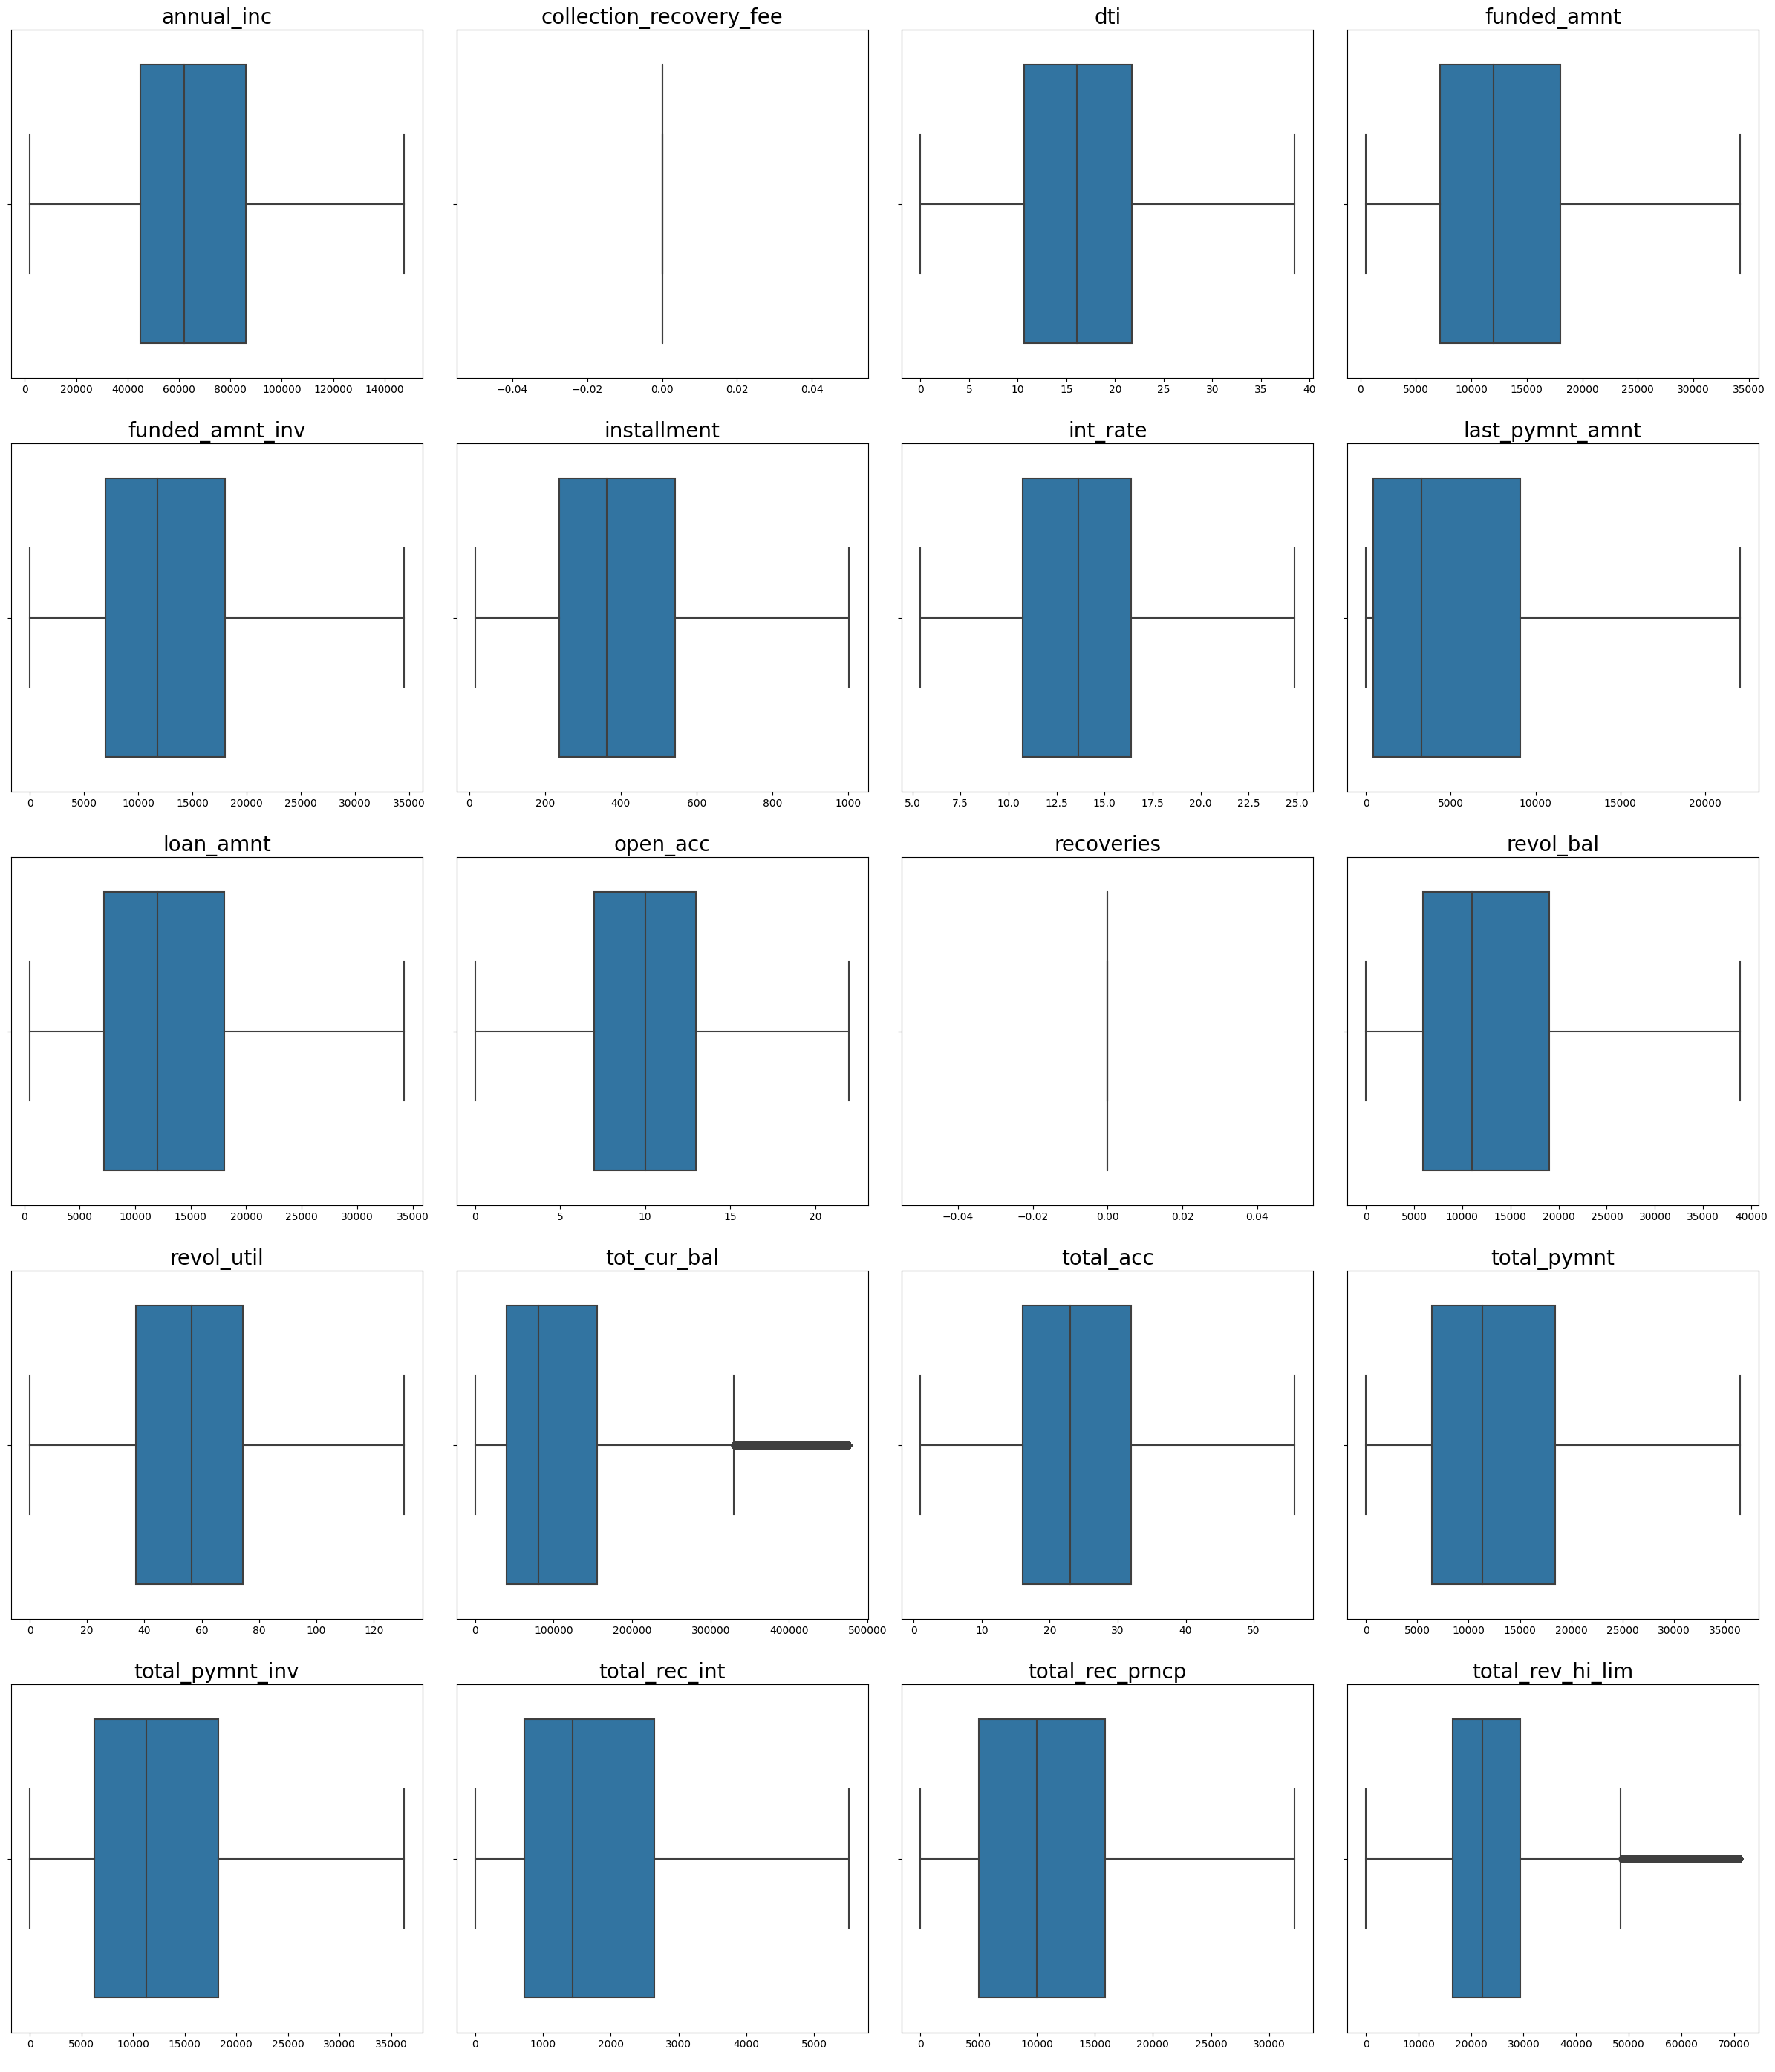

In [203]:
plt.figure(figsize=(24,28))
i = 1
for colname in selected_NumericalFeature:
    plt.subplot(5, 4, i)
    sns.boxplot(x=new_df[list(selected_NumericalFeature)][colname])
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1


In [204]:
print(new_df['collection_recovery_fee'].max())
print(new_df['recoveries'].max())

0.0
0.0


##### Because most values in "collection recovery fee and recoveries" is zero and other values is outlier, we must drop the columns

In [205]:
selected_NumericalFeature.remove('collection_recovery_fee')
selected_NumericalFeature.remove('recoveries')

# Exploratory Data Analysis (EDA) "Categorical Data"

In [206]:
categorical_Columns = list(new_df.select_dtypes(include='O').columns)

categorical_Columns.sort()

categorical_Columns, len(categorical_Columns)

(['addr_state',
  'application_type',
  'earliest_cr_line',
  'emp_length',
  'emp_title',
  'grade',
  'home_ownership',
  'initial_list_status',
  'issue_d',
  'last_credit_pull_d',
  'last_pymnt_d',
  'purpose',
  'pymnt_plan',
  'sub_grade',
  'term',
  'title',
  'url',
  'verification_status',
  'zip_code'],
 19)

In [207]:
columns_info = []

for colnames in new_df[categorical_Columns].columns:
    info = [colnames,
            new_df[colnames].isna().sum(),
            f"{round((new_df[colnames].isna().sum() / new_df[colnames].shape[0]) * 100, 2)}%",
            new_df[colnames].nunique(),
            new_df[colnames].value_counts(),
            new_df[colnames].unique(),
           ]
    
    columns_info.append(info)

In [208]:
categrical_ColInfo = pd.DataFrame(data = columns_info, 
                                  columns = ['col names', 'null values', '% null values', 'n unqiue', 'val count','unique'])


In [209]:
categrical_ColInfo

,col names,null values,% null values,n unqiue,val count,unique
0,addr_state,0,0.0%,50,"CA 39429 NY 19795 TX 17536 FL 16066 NJ 8931 IL 8534 PA 7752 GA 7317 VA 7245 OH 7066 NC 6217 MA 5727 AZ 5490 MD 5471 MI 5375 WA 5351 CO 5035 MN 3994 MO 3675 CT 3460 NV 3428 OR 3013 AL 2857 WI 2794 LA 2675 SC 2572 IN 2398 TN 2093 KY 2087 OK 1931 KS 1913 UT 1886 AR 1609 HI 1317 NM 1245 NH 1062 WV 1033 RI 982 DC 782 MT 679 AK 613 DE 606 WY 547 SD 492 VT 386 MS 290 IA 13 NE 13 ID 9 ME 4 Name: addr_state, dtype: int64","[AZ, GA, IL, CA, TX, VA, MO, CT, UT, FL, NY, PA, MN, NJ, OR, KY, OH, SC, RI, LA, MA, WA, WI, AL, NV, AK, CO, MD, WV, VT, MI, DC, SD, NC, AR, NM, KS, HI, OK, MT, WY, NH, DE, MS, TN, IA, NE, ID, IN, ME]"
1,application_type,0,0.0%,1,"INDIVIDUAL 230795 Name: application_type, dtype: int64",[INDIVIDUAL]
2,earliest_cr_line,29,0.01%,634,"Oct-00 1972 Oct-99 1837 Nov-00 1796 Oct-01 1779 Aug-00 1758 ... Oct-11 1 Nov-11 1 Jan-46 1 Sep-56 1 Nov-56 1 Name: earliest_cr_line, Length: 634, dtype: int64","[Jan-85, Apr-99, Nov-01, Feb-96, Nov-04, Jan-07, Apr-04, Sep-04, Jan-98, Oct-89, Jul-03, May-91, Sep-07, Oct-98, Aug-93, Oct-03, Jan-01, Nov-97, Feb-83, Jul-85, Apr-03, Jun-01, Feb-02, Aug-84, Nov-06, Dec-87, Nov-81, Apr-05, Oct-07, Jul-05, Dec-00, Apr-07, Jan-03, Mar-94, Sep-98, Jun-04, Nov-95, Jul-99, Jun-95, Sep-92, Jan-02, Apr-92, Oct-06, May-00, Dec-98, Dec-04, Oct-00, May-02, Jul-02, Jul-06, May-97, Oct-05, Apr-95, Oct-02, Jan-00, Apr-00, Dec-94, Sep-05, Dec-84, Dec-99, Nov-03, Jun-89, Jun-03, Oct-96, May-03, Jun-02, Jun-07, Dec-96, Sep-02, Jan-86, May-98, Jan-97, Jun-05, Feb-90, Mar-04, Jul-95, Aug-94, Jun-92, May-06, Mar-97, Apr-06, Apr-90, Aug-99, Sep-00, Feb-01, Dec-88, Feb-99, Dec-91, Aug-00, Oct-04, Aug-04, Feb-05, Nov-05, Nov-00, May-07, Jan-91, Jun-00, Aug-06, Dec-02, Jun-93, ...]"
3,emp_length,8755,3.79%,11,"10+ years 68761 2 years 21647 < 1 year 19319 3 years 18761 5 years 16821 1 year 15575 4 years 14940 6 years 13845 7 years 13034 8 years 10698 9 years 8639 Name: emp_length, dtype: int64","[10+ years, < 1 year, 3 years, 9 years, 4 years, 5 years, 1 year, 6 years, 2 years, 7 years, 8 years, None]"
4,emp_title,12917,5.6%,126879,"Teacher 1541 Manager 1514 Registered Nurse 673 RN 670 Supervisor 667 ... OKLAHOMA CITY COMMUNITY 1 National Distribution Service 1 AS America Inc. 1 Yummly, Inc. 1 Server Engineer Lead 1 Name: emp_title, Length: 126879, dtype: int64","[None, Ryder, AIR RESOURCES BOARD, Veolia Transportaton, MKC Accounting , Starbucks, Southwest Rural metro, UCLA, Va. Dept of Conservation/Recreation, Target, SFMTA, Internal revenue Service, Chin's Restaurant, Duracell, Connection Inspection, Network Interpreting Service, Archdiocese of Galveston Houston, Osram Sylvania, Value Air, Wells Fargo Bank, bmg-educational, Winfield Pathology Consultants, nyc transit, Frito Lay, Shands Hospital at the University of Fl, Oakridge homes, Audubon Mutual Housing Corporation, Good Samaritan Society, GREG BARRETT DRYWALL, Sharp Lawn Inc., Department of Justice, Gateway Hospice, Cox Communications, Nucor Building Systems, John Wiley Jr., citizens bank, Stewart Enterprises, Inc., golfers warehouse, STERIS Corporation, Costco Wholesale Corp., Helicoil, cognizant technology solutions, Caterpillar Inc., City of Santa Monica , Aerotek Scientific, Chemat Technology Inc, Scott & White, Costco, CA Technologies, Netflix, DCAA, Triple D security , wrisco, ..."
5,grade,0,0.0%,7,"B 70622 C 58626 A 39110 D 36740 E 16945 F 6896 G 1856 Name: grade, dtype: int64","[B, C, A, E, F, D, G]"
6,home_ownership,0,0.0%,6,"MORTGAGE 113627 RENT 97606 OWN 19334 OTHER 179 NONE 48 ANY 1 Name: home_ownership, dtype: int64","[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
7,initial_list_status,0,0.0%,2,"f 173143 w 57652 Name: initial_list_status, dtype: int64","[f, w]"
8,issue_d,0,0.0%,91,Oct-14 8808 Jul-14 8614 Apr-14 6744 Nov-13 6665 Oct-13 6653 Dec-13 6644 Jan-14 6522 May-14 6446 Aug-13 6425 Sep-13 6369 Mar-14 6191 Jul-13 6173 Jun-13 6025 Feb-14 5907 May-13 5895 Nov-12 5867 Oc

If a categorical column has too many unique values, the model will most likely catch noise or irrelevant patterns, thereby increasing the possibility of overfitting.

So from the information above we can use our intuition to choose which is the most useful categorical features for the machine learning model 

In this case i will use
1. grade
2. emp_length 	
3. home ownership
4. verification_status 	
5. purpose

In [210]:
selected_CategoricalFeature = ["grade", "emp_length", "home_ownership", "verification_status", "purpose"]

In [211]:
model_Features = selected_CategoricalFeature + selected_NumericalFeature

model_Features.sort()

model_Features, len(model_Features)

(['annual_inc',
  'dti',
  'emp_length',
  'funded_amnt',
  'funded_amnt_inv',
  'grade',
  'home_ownership',
  'installment',
  'int_rate',
  'last_pymnt_amnt',
  'loan_amnt',
  'open_acc',
  'purpose',
  'revol_bal',
  'revol_util',
  'tot_cur_bal',
  'total_acc',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_prncp',
  'total_rev_hi_lim',
  'verification_status'],
 23)

#### Drop all unused categorical and numerical columns/features 

In [212]:
for colname in new_df:
    if colname not in model_Features:
        new_df.drop(labels=[colname], inplace = True, axis = 1)

In [213]:
new_df

,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,purpose,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status
0,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65,171.62,5000,3.0,credit_card,13648.0,83.7,80282.0,9.0,5861.071414,5831.78,861.07,5000.00,22100.0,Verified
1,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27,119.66,2500,3.0,car,1687.0,9.4,80282.0,4.0,1008.710000,1008.71,435.17,456.46,22100.0,Source Verified
2,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96,649.91,2400,2.0,small_business,2956.0,98.5,80282.0,10.0,3003.653644,3003.65,603.65,2400.00,22100.0,Not Verified
3,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49,357.48,10000,10.0,other,5598.0,21.0,80282.0,37.0,12226.302210,12226.30,2209.33,10000.00,22100.0,Source Verified
5,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90,161.03,5000,9.0,wedding,7963.0,28.3,80282.0,12.0,5631.377753,5631.38,631.38,5000.00,22100.0,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,37536.0,12.28,5 years,8525,8525.0,D,MORTGAGE,217.65,18.25,217.65,8525,12.0,medical,5318.0,10.7,116995.0,26.0,2029.930000,2029.93,510.45,360.08,49800.0,Verified
466277,90000.0,10.33,3 years,18000,17975.0,A,RENT,563.23,7.90,563.23,18000,16.0,debt_consolidation,8224.0,16.3,42592.0,33.0,5631.670000,5623.85,1050.78,4580.89,50300.0,Verified
466278,42000.0,11.57,10+ years,10000,10000.0,D,RENT,362.78,18.25,5501.60,10000,9.0,vacation,3196.0,28.8,10170.0,24.0,12394.165200,12394.17,2394.17,10000.00,11100.0,Source Verified
466281,78000.0,18.45,10+ years,22000,22000.0,D,MORTGAGE,582.50,19.97,17.50,22000,18.0,debt_consolidation,18238.0,46.3,221830.0,30.0,4677.920000,4677.92,2840.88,1837.04,39400.0,Verified


In [214]:
new_df['loan_status'] = y

In [215]:
new_df.isna().sum()

annual_inc                0
dti                       0
emp_length             8755
funded_amnt               0
funded_amnt_inv           0
grade                     0
home_ownership            0
installment               0
int_rate                  0
last_pymnt_amnt           0
loan_amnt                 0
open_acc                  0
purpose                   0
revol_bal                 0
revol_util                0
tot_cur_bal               0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_int             0
total_rec_prncp           0
total_rev_hi_lim          0
verification_status       0
loan_status               0
dtype: int64

In [216]:
new_df.dropna()

,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,purpose,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status,loan_status
0,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65,171.62,5000,3.0,credit_card,13648.0,83.7,80282.0,9.0,5861.071414,5831.78,861.07,5000.00,22100.0,Verified,1
1,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27,119.66,2500,3.0,car,1687.0,9.4,80282.0,4.0,1008.710000,1008.71,435.17,456.46,22100.0,Source Verified,0
2,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96,649.91,2400,2.0,small_business,2956.0,98.5,80282.0,10.0,3003.653644,3003.65,603.65,2400.00,22100.0,Not Verified,1
3,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49,357.48,10000,10.0,other,5598.0,21.0,80282.0,37.0,12226.302210,12226.30,2209.33,10000.00,22100.0,Source Verified,1
5,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90,161.03,5000,9.0,wedding,7963.0,28.3,80282.0,12.0,5631.377753,5631.38,631.38,5000.00,22100.0,Source Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,37536.0,12.28,5 years,8525,8525.0,D,MORTGAGE,217.65,18.25,217.65,8525,12.0,medical,5318.0,10.7,116995.0,26.0,2029.930000,2029.93,510.45,360.08,49800.0,Verified,0
466277,90000.0,10.33,3 years,18000,17975.0,A,RENT,563.23,7.90,563.23,18000,16.0,debt_consolidation,8224.0,16.3,42592.0,33.0,5631.670000,5623.85,1050.78,4580.89,50300.0,Verified,0
466278,42000.0,11.57,10+ years,10000,10000.0,D,RENT,362.78,18.25,5501.60,10000,9.0,vacation,3196.0,28.8,10170.0,24.0,12394.165200,12394.17,2394.17,10000.00,11100.0,Source Verified,1
466281,78000.0,18.45,10+ years,22000,22000.0,D,MORTGAGE,582.50,19.97,17.50,22000,18.0,debt_consolidation,18238.0,46.3,221830.0,30.0,4677.920000,4677.92,2840.88,1837.04,39400.0,Verified,0


##### Final Dataframe

In [217]:
new_df

,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,purpose,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status,loan_status
0,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65,171.62,5000,3.0,credit_card,13648.0,83.7,80282.0,9.0,5861.071414,5831.78,861.07,5000.00,22100.0,Verified,1
1,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27,119.66,2500,3.0,car,1687.0,9.4,80282.0,4.0,1008.710000,1008.71,435.17,456.46,22100.0,Source Verified,0
2,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96,649.91,2400,2.0,small_business,2956.0,98.5,80282.0,10.0,3003.653644,3003.65,603.65,2400.00,22100.0,Not Verified,1
3,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49,357.48,10000,10.0,other,5598.0,21.0,80282.0,37.0,12226.302210,12226.30,2209.33,10000.00,22100.0,Source Verified,1
5,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90,161.03,5000,9.0,wedding,7963.0,28.3,80282.0,12.0,5631.377753,5631.38,631.38,5000.00,22100.0,Source Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,37536.0,12.28,5 years,8525,8525.0,D,MORTGAGE,217.65,18.25,217.65,8525,12.0,medical,5318.0,10.7,116995.0,26.0,2029.930000,2029.93,510.45,360.08,49800.0,Verified,0
466277,90000.0,10.33,3 years,18000,17975.0,A,RENT,563.23,7.90,563.23,18000,16.0,debt_consolidation,8224.0,16.3,42592.0,33.0,5631.670000,5623.85,1050.78,4580.89,50300.0,Verified,0
466278,42000.0,11.57,10+ years,10000,10000.0,D,RENT,362.78,18.25,5501.60,10000,9.0,vacation,3196.0,28.8,10170.0,24.0,12394.165200,12394.17,2394.17,10000.00,11100.0,Source Verified,1
466281,78000.0,18.45,10+ years,22000,22000.0,D,MORTGAGE,582.50,19.97,17.50,22000,18.0,debt_consolidation,18238.0,46.3,221830.0,30.0,4677.920000,4677.92,2840.88,1837.04,39400.0,Verified,0


In [218]:
new_df['loan_status'].value_counts()

1    184739
0     46056
Name: loan_status, dtype: int64

Imbalance data for target predictions

#### Do one hot encoding for categorical data

In [219]:
y = new_df['loan_status'] 
X = new_df.drop(labels = ['loan_status'], axis = 1)

In [220]:
X = pd.get_dummies(X, columns = ['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose'], prefix_sep='__')


In [221]:
X

,annual_inc,dti,funded_amnt,funded_amnt_inv,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,grade__A,grade__B,grade__C,grade__D,grade__E,grade__F,grade__G,emp_length__1 year,emp_length__10+ years,emp_length__2 years,emp_length__3 years,emp_length__4 years,emp_length__5 years,emp_length__6 years,emp_length__7 years,emp_length__8 years,emp_length__9 years,emp_length__< 1 year,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__NONE,home_ownership__OTHER,home_ownership__OWN,home_ownership__RENT,verification_status__Not Verified,verification_status__Source Verified,verification_status__Verified,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__educational,purpose__home_improvement,purpose__house,purpose__major_purchase,purpose__medical,purpose__moving,purpose__other,purpose__renewable_energy,purpose__small_business,purpose__vacation,purpose__wedding
0,24000.0,27.65,5000,4975.0,162.87,10.65,171.62,5000,3.0,13648.0,83.7,80282.0,9.0,5861.071414,5831.78,861.07,5000.00,22100.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,30000.0,1.00,2500,2500.0,59.83,15.27,119.66,2500,3.0,1687.0,9.4,80282.0,4.0,1008.710000,1008.71,435.17,456.46,22100.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12252.0,8.72,2400,2400.0,84.33,15.96,649.91,2400,2.0,2956.0,98.5,80282.0,10.0,3003.653644,3003.65,603.65,2400.00,22100.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,49200.0,20.00,10000,10000.0,339.31,13.49,357.48,10000,10.0,5598.0,21.0,80282.0,37.0,12226.302210,12226.30,2209.33,10000.00,22100.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,36000.0,11.20,5000,5000.0,156.46,7.90,161.03,5000,9.0,7963.0,28.3,80282.0,12.0,5631.377753,5631.38,631.38,5000.00,22100.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,37536.0,12.28,8525,8525.0,217.65,18.25,217.65,8525,12.0,5318.0,10.7,116995.0,26.0,2029.930000,2029.93,510.45,360.08,49800.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
466277,90000.0,10.33,18000,17975.0,563.23,7.90,563.23,18000,16.0,8224.0,16.3,42592.0,33.0,5631.670000,5623.85,1050.78,4580.89,50300.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466278,42000.0,11.57,10000,10000.0,362.78,18.25,5501.60,10000,9.0,3196.0,28.8,10170.0,24.0,12394.165200,12394.17,2394.17,10000.00,11100.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466281,78000.0,18.45,22000,22000.0,582.50,19.97,17.50,22000,18.0,18238.0,46.3,221830.0,30.0,4677.920000,4677.92,2840.88,1837.04,39400.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Split dataset for train and test : 80, 20

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184636, 59), (46159, 59), (184636,), (46159,))

#### Feature Scaling

In [223]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_trainScale = scaler.transform(X_train)
X_testScale = scaler.transform(X_test)

#### Handle Imbalance Target Using SMOTE Method

In [224]:
sm = SMOTE(random_state=24)

sm.fit(X_trainScale, y_train)

X_smote, y_smote = sm.fit_resample(X_trainScale, y_train)

X_smote.shape, X_trainScale.shape, y_smote.shape, y_train.shape

((295582, 59), (184636, 59), (295582,), (184636,))

#### Create machine learning model using logistic regression

In [225]:
log_reg = LogisticRegression(random_state = 24, max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1) 
log_reg.fit(X_smote, y_smote)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   random_state=24, solver='sag')

In [226]:
log_reg.score(X_smote, y_smote), log_reg.score(X_testScale, y_test)

(0.9842581753963368, 0.9862648670898416)

#### Accracy, Recall, Precision, AUC Score

In [227]:
y_pred_proba = log_reg.predict_proba(X_testScale)

y_pred = log_reg.predict(X_testScale)

In [228]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])

In [229]:
print(accuracy)
print(recall)
print(precision)
print(AUC)

0.9862648670898416
0.994641117245859
0.9882751573172699
0.9942119518877826


In [230]:
report = classification_report(y_true = y_test, y_pred = log_reg.predict(X_testScale))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      9211
           1       0.99      0.99      0.99     36948

    accuracy                           0.99     46159
   macro avg       0.98      0.97      0.98     46159
weighted avg       0.99      0.99      0.99     46159



#### Confusion matrix

In [231]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = log_reg.predict(X_testScale ))

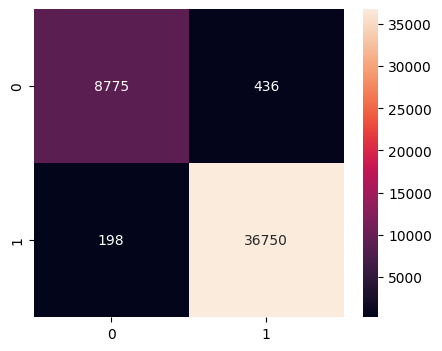

In [232]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.show()